In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [247]:
data = pd.read_csv('/content/sample_data/Train_data_Insurance.csv')

In [248]:
# Check the top five records of the data
data.head()

,customer_id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,561,46,19.95,2,9193.83850,0,0,1,0,0
1,1286,47,24.32,0,8534.67180,0,0,0,0,0
2,1143,52,24.86,0,27117.99378,0,0,0,1,0
3,970,39,34.32,5,8596.82780,0,0,0,1,0
4,487,54,21.47,3,12475.35130,0,0,1,0,0


In [180]:
data.shape

(1070, 10)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1070 non-null   int64  
 1   age               1070 non-null   int64  
 2   bmi               1070 non-null   float64
 3   children          1070 non-null   int64  
 4   charges           1070 non-null   float64
 5   sex_male          1070 non-null   int64  
 6   smoker_yes        1070 non-null   int64  
 7   region_northwest  1070 non-null   int64  
 8   region_southeast  1070 non-null   int64  
 9   region_southwest  1070 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 83.7 KB


In [182]:
data.isnull().sum()

,0
customer_id,0
age,0
bmi,0
children,0
charges,0
sex_male,0
smoker_yes,0
region_northwest,0
region_southeast,0
region_southwest,0


Observations: • There are 1070 observations and 10 columns in the data. • All the columns are of numeric data type. • There are no missing values in the data. One hot encoding already done.

In [183]:
num_features = ['age', 'bmi', 'children','charges']

In [184]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,1070.0,667.579439,386.312762,1.0000,333.250000,671.0000,1003.75000,1338.00000
age,1070.0,39.357009,14.073960,18.0000,27.000000,39.5000,51.00000,64.00000
bmi,1070.0,30.560397,6.043386,15.9600,26.205000,30.2100,34.49625,53.13000
children,1070.0,1.107477,1.215983,0.0000,0.000000,1.0000,2.00000,5.00000
charges,1070.0,13346.089736,12019.510778,1121.8739,4897.667387,9575.4421,16746.65740,62592.87309
sex_male,1070.0,0.512150,0.500086,0.0000,0.000000,1.0000,1.00000,1.00000
smoker_yes,1070.0,0.205607,0.404334,0.0000,0.000000,0.0000,0.00000,1.00000
region_northwest,1070.0,0.239252,0.426827,0.0000,0.000000,0.0000,0.00000,1.00000
region_southeast,1070.0,0.264486,0.441265,0.0000,0.000000,0.0000,1.00000,1.00000
region_southwest,1070.0,0.246729,0.431309,0.0000,0.000000,0.0000,0.00000,1.00000


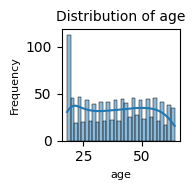

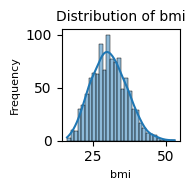

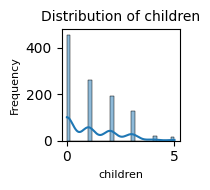

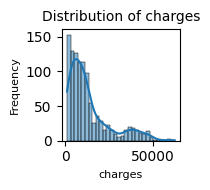

In [185]:
for col in num_features:
        plt.figure(figsize=(2, 2))  # smaller size
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}', fontsize=10)
        plt.xlabel(col, fontsize=8)
        plt.ylabel('Frequency', fontsize=8)
        plt.tight_layout()
        plt.show()

In [186]:
data.corr()

,customer_id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
customer_id,1.000000,-0.036074,-0.028844,0.037634,0.023207,-0.020921,0.025587,0.008287,-0.014482,-0.002307
age,-0.036074,1.000000,0.118274,0.060999,0.281721,-0.008459,-0.052035,0.013019,-0.015068,0.022307
bmi,-0.028844,0.118274,1.000000,-0.005040,0.197316,0.015293,-0.003450,-0.112666,0.247317,0.010248
children,0.037634,0.060999,-0.005040,1.000000,0.071885,0.017080,0.013994,0.033319,-0.025133,-0.002450
charges,0.023207,0.281721,0.197316,0.071885,1.000000,0.056802,0.780063,-0.033776,0.067491,-0.034994
sex_male,-0.020921,-0.008459,0.015293,0.017080,0.056802,1.000000,0.070908,0.017047,-0.008217,-0.013911
smoker_yes,0.025587,-0.052035,-0.003450,0.013994,0.780063,0.070908,1.000000,-0.030547,0.051450,-0.033688
region_northwest,0.008287,0.013019,-0.112666,0.033319,-0.033776,0.017047,-0.030547,1.000000,-0.336290,-0.320954
region_southeast,-0.014482,-0.015068,0.247317,-0.025133,0.067491,-0.008217,0.051450,-0.336290,1.000000,-0.343194
region_southwest,-0.002307,0.022307,0.010248,-0.002450,-0.034994,-0.013911,-0.033688,-0.320954,-0.343194,1.000000


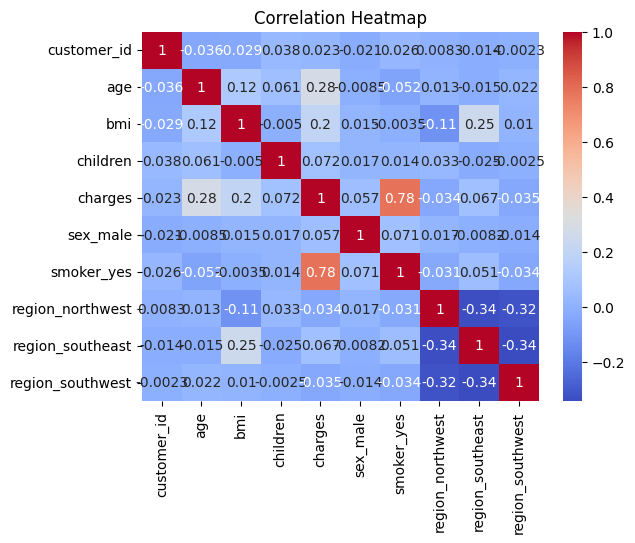

In [187]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

EDA

Univariate analysis.

AGE : 18–64 (adult customers only).

avg age is ~39 years.

Likely positively correlated with charges (older → higher risk → higher costs).

bmi : Range: 15.9–53.13.

avg is ~30.6 (borderline obese).

Outliers present (BMI > 40).

Important predictor for healthcare costs .

charges is Target variable. range between 1,122 – 62,593 USD.

Skewed distribution → many people have low/medium costs, a few have very high costs.

sex_male : ~51% male, 49% female.Balanced, but usually weak effect on healthcare cost compared to smoking and BMI.

smoker_yes :20.5% smokers, 79.5% non-smokers.

Critical column: smoking dramatically increases costs.

region_northwest / southeast / southwest:One-hot encoded region categories (northeast is baseline).

Distribution: ~24–26% per region, fairly balanced.

Might capture geographic pricing differences, but smaller impact.

Bivariate Analysis

smoker_yes and charges have high positive correlations.

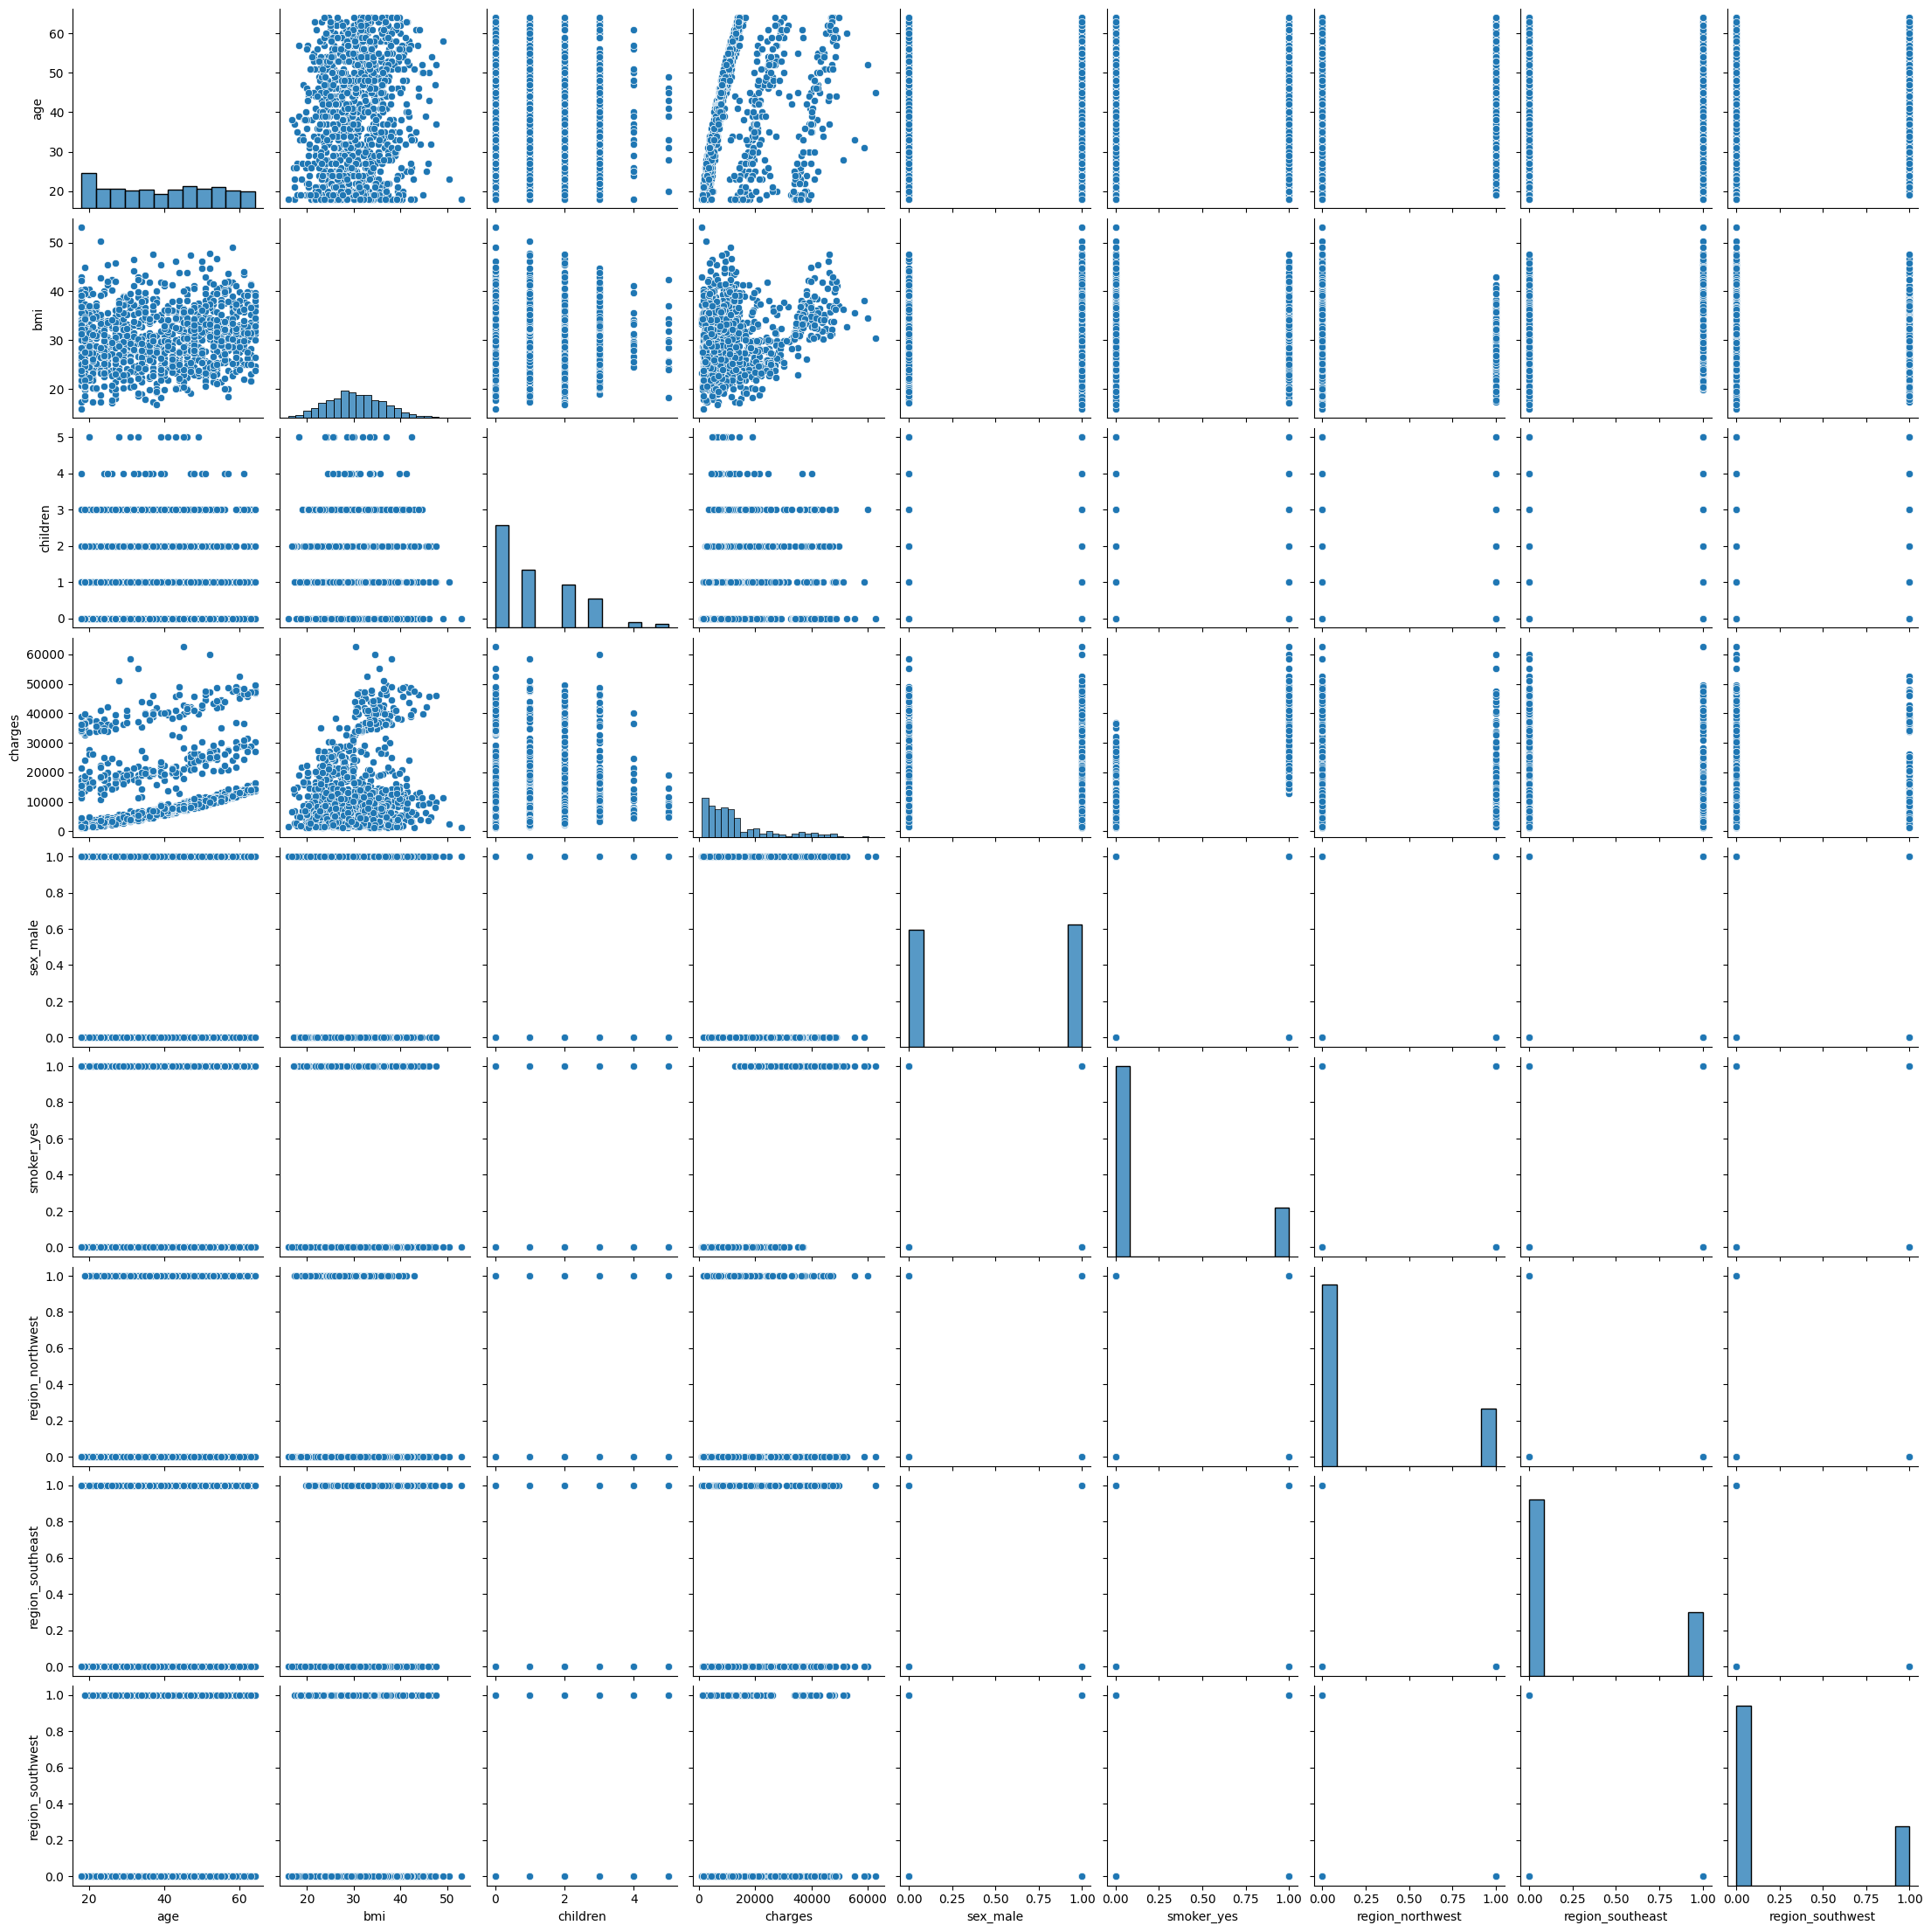

In [78]:
sns.pairplot(data)
plt.show()

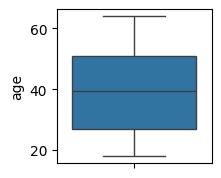

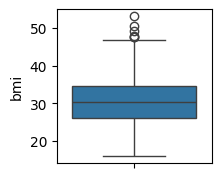

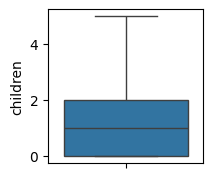

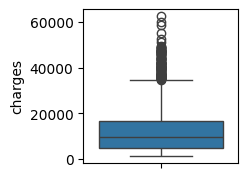

In [188]:
for col in num_features:
        plt.figure(figsize=(2, 2))  # smaller size
        sns.boxplot(data[col])


In [189]:
cat_col = ['sex_male', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

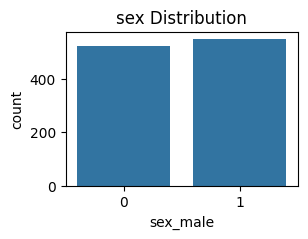

In [190]:

plt.figure(figsize=(3, 2))
sns.countplot(x="sex_male", data=data)
plt.title("sex Distribution")
plt.show()

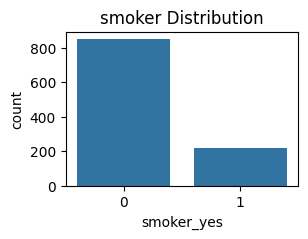

In [191]:
plt.figure(figsize=(3, 2))
sns.countplot(x="smoker_yes", data=data)
plt.title("smoker Distribution")
plt.show()

In [260]:
df.drop('customer_id', axis=1, inplace=True)

In [261]:
df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,45,25.175,2,0,0,0,0,0
1,36,30.020,0,0,0,1,0,0
2,64,26.885,0,0,1,1,0,0
3,46,25.745,3,1,0,1,0,0
4,19,31.920,0,1,1,1,0,0


In [262]:
X = data.drop(['charges'], axis=1)  # numeric features
y = data['charges']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop('customer_id', axis=1).values)
X_val_scaled = scaler.transform(X_val.drop('customer_id', axis=1).values)
X_train_scaled
X_val_scaled

array([[ 0.68408548,  0.06041023, -0.90547878, ..., -0.55575939,
        -0.59174127,  1.68480415],
       [-0.09404316,  1.56778652, -0.90547878, ..., -0.55575939,
         1.68992777, -0.5935408 ],
       [ 0.54260755,  0.90454095, -0.09301564, ..., -0.55575939,
         1.68992777, -0.5935408 ],
       ...,
       [ 0.75482445, -1.13897242,  0.7194475 , ..., -0.55575939,
         1.68992777, -0.5935408 ],
       [ 1.10851929, -0.00477361, -0.90547878, ..., -0.55575939,
        -0.59174127,  1.68480415],
       [ 0.61334651, -0.53194792, -0.09301564, ..., -0.55575939,
        -0.59174127, -0.5935408 ]])

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [265]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [266]:
y_pred = model.predict(X_val_scaled)

In [267]:
r2_score(y_val, y_pred)

0.7268029806501222

In [268]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_val, y_pred))

np.float64(6602.0395021725635)

In [269]:

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train_scaled,y_train)
y_pred = rfr.predict(X_val_scaled)
print("R2 score is ",r2_score(y_val, y_pred))
print("mean sq error is ", np.sqrt(mean_squared_error(y_val, y_pred)))

R2 score is  0.8016244302754851
mean sq error is  5625.799286809419


In [271]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

br = BaggingRegressor(n_estimators=100, random_state=42)
br.fit(X_train_scaled, y_train)
y_pred = br.predict(X_val_scaled)
print("R2 score is ",r2_score(y_val, y_pred))
root_mean_squared_error = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error:", root_mean_squared_error)

R2 score is  0.8077930585601458
Root Mean Squared Error: 5537.639427453247


In [273]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


# 2️⃣ Ridge Regression

ridge = Ridge(alpha=10)  # alpha = regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_val_scaled)

# 3️⃣ Lasso Regression
lasso = Lasso(alpha=0.001)  # smaller alpha so it doesn't shrink everything to 0
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_val_scaled)

# Function to evaluate models
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} → R2: {r2:.4f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")


evaluate_model("Ridge Regression", y_val, y_pred_ridge)
evaluate_model("Lasso Regression", y_val, y_pred_lasso)

Ridge Regression → R2: 0.7263, MSE: 43660739.46, RMSE: 6607.63
Lasso Regression → R2: 0.7268, MSE: 43586926.73, RMSE: 6602.04


In [274]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb


rfr=RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(X_train_scaled,y_train)
y_pred = rfr.predict(X_val_scaled)
print("random forest")
print("R2 score is ",r2_score(y_val, y_pred))

print("root mean sq error is ", np.sqrt(mean_squared_error(y_val, y_pred)))


# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled,y_train)
y_pred = gb.predict(X_val_scaled)
print("Gradient Boosting")
print("R2 score is ",r2_score(y_val, y_pred))
print("root mean sq error is ", np.sqrt(mean_squared_error(y_val, y_pred)))

# XGBoost
xg = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xg.fit(X_train_scaled,y_train)
y_pred = xg.predict(X_val_scaled)
print("XGBoost")
print("R2 score is ",r2_score(y_val, y_pred))
print("root mean sq error is ", np.sqrt(mean_squared_error(y_val, y_pred)))

random forest
R2 score is  0.8056223051484978
root mean sq error is  5568.82222328245
Gradient Boosting
R2 score is  0.7943268959979789
root mean sq error is  5728.341374158914
XGBoost
R2 score is  0.780743282635495
root mean sq error is  5914.480360213199


In [275]:
#Best model

br = BaggingRegressor(n_estimators=100, random_state=42)
br.fit(X_train_scaled, y_train)
y_pred = br.predict(X_val_scaled)
print("R2 score is ",r2_score(y_val, y_pred))
root_mean_squared_error = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error:", root_mean_squared_error)

R2 score is  0.8077930585601458
Root Mean Squared Error: 5537.639427453247


In [291]:
bag_model = BaggingRegressor(
    n_estimators=100,       # number of trees
    random_state=42,
    max_samples=0.8,        # fraction of samples to use for each tree
    max_features=0.8        # fraction of features to use for each tree

)

# Train model
bag_model.fit(X_train_scaled, y_train)

# -------------------------
# Validation performance
# -------------------------
y_val_pred = bag_model.predict(X_val_scaled)
print("Validation R2 score:", r2_score(y_val, y_val_pred))
print("Validation MSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))

Validation R2 score: 0.742856381057105
Validation MSE: 6405.130992366013


In [292]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(random_state=42)

# -------------------------
# Define hyperparameter grid
# -------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# -------------------------
# Grid Search with 5-fold cross-validation
# -------------------------
grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,            # use all cores
    scoring='r2',         # evaluate by R^2 score
    verbose=2
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best model & hyperparameters
best_rfr = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# -------------------------
# Evaluate on validation set
# -------------------------
y_val_pred = best_rfr.predict(X_val_scaled)
print("Validation R2 score:", r2_score(y_val, y_val_pred))
print("Validation MSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Validation R2 score: 0.8164125807785374
Validation MSE: 5412.047486504153


In [299]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Best hyperparameters from grid search (from aFCurTm1ELN8)
best_params = {
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100
}

# Initialize RandomForestRegressor with best hyperparameters
rfr2 = RandomForestRegressor(**best_params, random_state=42)

# Train model
rfr2.fit(X_train_scaled, y_train)

# -------------------------
# Validation performance
# -------------------------
y_val_pred = rfr2.predict(X_val_scaled)
print("Validation R2 score:", r2_score(y_val, y_val_pred))
print("Validation MSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))

Validation R2 score: 0.8164125807785374
Validation MSE: 5412.047486504153


In [298]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


bag = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

# -------------------------
# Define hyperparameter grid
# -------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],      # fraction of samples for each base estimator
    'max_features': [0.5, 0.7, 1.0],     # fraction of features for each base estimator
    'bootstrap': [True, False],          # sample with replacement or not
    'bootstrap_features': [False, True]  # feature sampling with replacement
}

# -------------------------
# Grid Search with 5-fold cross-validation
# -------------------------
grid_search = GridSearchCV(
    estimator=bag,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,            # use all cores
    scoring='r2',         # evaluate by R^2 score
    verbose=2
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best model & hyperparameters
best_bag = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# -------------------------
# Evaluate on validation set
# -------------------------
y_val_pred = best_rfr.predict(X_val_scaled)
print("Validation R2 score:", r2_score(y_val, y_val_pred))
print("Validation MSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}
Validation R2 score: 0.8164125807785374
Validation MSE: 5412.047486504153


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras import backend as K

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.2)


Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 319307680.0000 - rmse: 17759.8984 - val_loss: 350620160.0000 - val_rmse: 18671.0645
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 332549856.0000 - rmse: 17984.0000 - val_loss: 350558688.0000 - val_rmse: 18669.4004
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 312241984.0000 - rmse: 17515.1230 - val_loss: 350414784.0000 - val_rmse: 18665.5254
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 304664288.0000 - rmse: 17254.1328 - val_loss: 350095168.0000 - val_rmse: 18656.9004
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 295050432.0000 - rmse: 17015.4844 - val_loss: 349449440.0000 - val_rmse: 18639.4707
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 313636736.0000 - rmse: 17525.9199 - val_loss: 348254496.0000 - val_rmse: 18607.2402
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 321098592.0000 - rmse: 17661.7246 - val_loss: 346337664.0000 - val_rmse: 18555.4316
Epoc

In [300]:
df = pd.read_csv('/content/sample_data/Test_data_Insurance (2).csv')

In [301]:
df.head()

,customer_id,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,765,45,25.175,2,0,0,0,0,0
1,888,36,30.020,0,0,0,1,0,0
2,891,64,26.885,0,0,1,1,0,0
3,1294,46,25.745,3,1,0,1,0,0
4,260,19,31.920,0,1,1,1,0,0


In [302]:
X_test = df.drop('customer_id', axis=1)

In [303]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,45,25.175,2,0,0,0,0,0
1,36,30.020,0,0,0,1,0,0
2,64,26.885,0,0,1,1,0,0
3,46,25.745,3,1,0,1,0,0
4,19,31.920,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
263,63,35.090,0,1,1,0,1,0
264,58,27.170,0,0,0,1,0,0
265,38,28.025,1,1,0,0,0,0
266,54,47.410,0,0,1,0,1,0


In [304]:
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [305]:
y_test_pred = rfr2.predict(X_test_scaled)

In [306]:
print("\nPredictions on custom test data:")
for cid, pred in zip(df['customer_id'], y_test_pred):
    print(f"Customer ID {cid} → Predicted Charges: {pred}")


Predictions on custom test data:
Customer ID 765 → Predicted Charges: 11268.626494231667
Customer ID 888 → Predicted Charges: 6285.12293029006
Customer ID 891 → Predicted Charges: 26691.850644435533
Customer ID 1294 → Predicted Charges: 10629.337244833068
Customer ID 260 → Predicted Charges: 34166.99741538377
Customer ID 1313 → Predicted Charges: 7779.134505793394
Customer ID 900 → Predicted Charges: 3168.976204407258
Customer ID 753 → Predicted Charges: 14448.08084588127
Customer ID 1287 → Predicted Charges: 5911.186328390172
Customer ID 708 → Predicted Charges: 11062.415396360046
Customer ID 781 → Predicted Charges: 19622.956909923905
Customer ID 568 → Predicted Charges: 7530.776312874837
Customer ID 77 → Predicted Charges: 4876.913202124972
Customer ID 266 → Predicted Charges: 41053.088184806824
Customer ID 902 → Predicted Charges: 41468.59465664185
Customer ID 894 → Predicted Charges: 42032.67693243629
Customer ID 651 → Predicted Charges: 11918.357306015263
Customer ID 616 → Predi

In [309]:
test_predictions = pd.DataFrame({
    'customer_id': df['customer_id'],
    'predicted_charges': y_test_pred
})

# 2. Save to CSV
test_predictions.to_csv('test_predictions.csv', index=False)

print("Test predictions saved to 'test_predictions.csv'")
print(test_predictions)

Test predictions saved to 'test_predictions.csv'
     customer_id  predicted_charges
0            765       11268.626494
1            888        6285.122930
2            891       26691.850644
3           1294       10629.337245
4            260       34166.997415
..           ...                ...
263          110       41809.123920
264          576       13035.833893
265          536        6327.181800
266          544       41401.079071
267          847       11062.887509

[268 rows x 2 columns]
